<a href="https://colab.research.google.com/github/Anishi2528/Anishi2528/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 6:  FRAUD DETECTION USING SOM

--- our job is to detect potential frauds among these applications.



Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn as sks
import matplotlib.pyplot as plt
%matplotlib inline 

Importing the dataset 

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Credit_Card_Applications.csv']))

In [ ]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
df.tail()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


In [ ]:
df.shape

(690, 16)

The dataset consists of 14 feature variables and 1 class label that quantifies the approval decision. 0 means application reected and 1 means application approved.


Subset creation of independent and dependent variable 


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

Scaling the data

In [ ]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

Implementing MINISOM

In [ ]:
!pip install minisom
from minisom import MiniSom

Training the SOM on data that does not include dependent variable 

In [ ]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [ ]:
som.random_weights_init(X)

Traing SOM on dependent data

In [ ]:
som.train_random(data=X, num_iteration=100)

Higher the MID, then more the WN is far away from its neighbours

Hence, higher the MID, the more it is an outlier

the closer the color will be to white if the WN has a higher MID

Visualizing the results to identify the outlying neurons inside the map

In [ ]:
from pylab import hot, pcolor, colorbar, plot, show

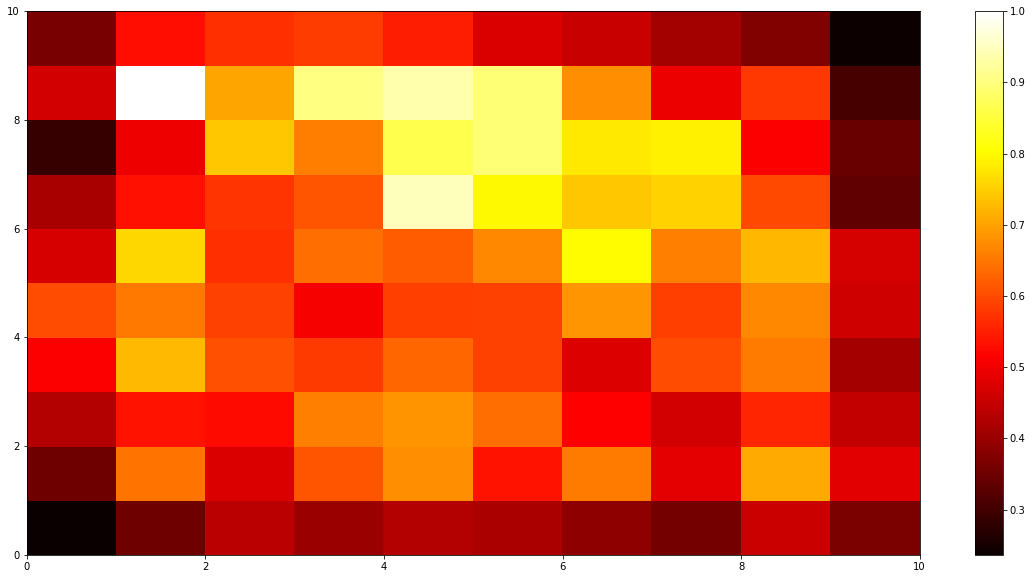

In [ ]:
plt.figure(figsize=(20,10))
hot()
pcolor(som.distance_map().T)
colorbar()

Hence we can conclude that highest MID is white color and lowest one is represented by dark color.  WNs which are far from the general rules are represented by white.To conclude we can say that the WNs with the highest MIDs are the fraud applications

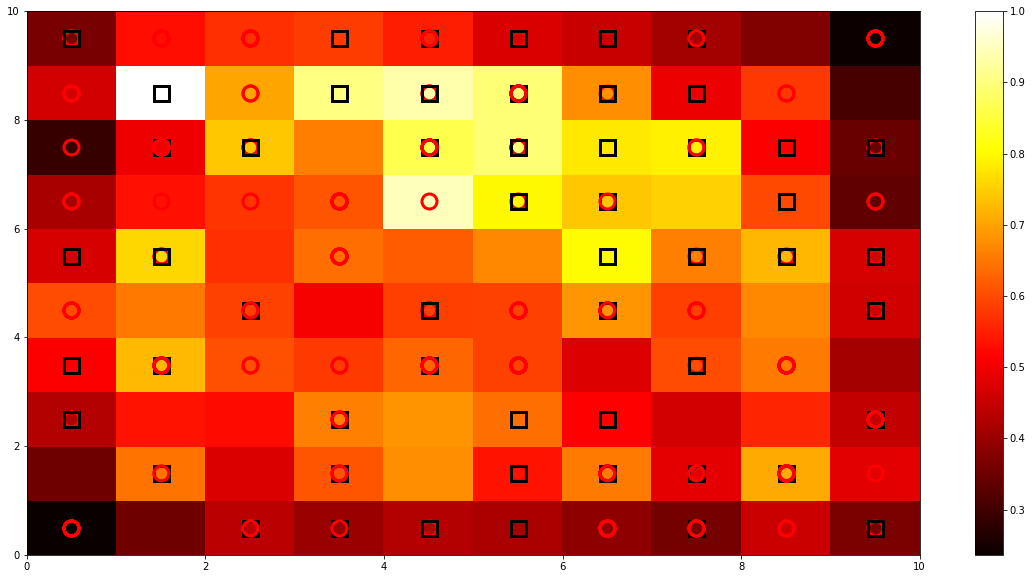

In [ ]:
plt.figure(figsize = (20,10))
hot()
pcolor(som.distance_map().T)
colorbar() 

# 'red circle' marker will represent customer who didn't get approval and 'green square' marker will represnt who did
markers = ['o', 's']
colors = ['red', 'black']

# creating the loop to apply the logic above
for m, n in enumerate(X):          
    wn = som.winner(n)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[y[m]], markeredgecolor = colors[y[m]], markerfacecolor = 'None', markersize=15,
                markeredgewidth = 3)  
    
show()

Making a list of the cheaters by mapping by using the method win_map which returns the dictionary of all the mappings from the WNs to the customers.
There are some cheaters who got approval and got away with it (the highest MID having both the markers in it) at the co-ordinate(x=4, y=8) 

In [ ]:
mappings = som.win_map(X)

In [ ]:
frauds = mappings[(4,8)]

In [ ]:
frauds = sc.inverse_transform(frauds)
df_frauds = pd.DataFrame(frauds)

In [ ]:
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15567839.0,0.0,28.58,3.540,2.0,3.0,5.0,0.5,1.0,0.0,0.0,1.0,2.0,171.0,1.0
1,15642336.0,0.0,57.08,0.335,2.0,3.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0,252.0,2198.0
2,15646190.0,0.0,60.58,16.500,2.0,11.0,4.0,11.0,1.0,0.0,0.0,1.0,2.0,21.0,10562.0


Conclusion: We got the Customer IDs of the fraudsters and a list of 3 such people.